hyperparameter for s3d models

---

In [1]:
import utils
import pandas as pd

In [2]:
import palettable
import seaborn as sns
sns.set_context("paper", font_scale=2)
%matplotlib inline

#color_list = palettable.cartocolors.qualitative.Bold_6_r.mpl_colors
color_list = pd.np.asarray(palettable.cartocolors.qualitative.Bold_6.mpl_colors)
color_list = color_list[[2,5,4,3,1,0]]

In [3]:
data_dict = {
             'classification': [
                                "breastcancer", #"magic", "hillvalley",
                                "twitter", "stackoverflow_cleaned_subset",
                                "spambase", "spectf", "parkinsons",
                                #"khan", 
                                "khan_cleaned", "digg", "duolingo_cleaned"
                               ],
             'regression': ["appenergy", "building_sales", "building_costs",
                            "pol", "breastcancer_reg",  
                            "boston_housing", "triazines",
                            "parkinsons_motor", "parkinsons_total",
                           ]
            }

---

#### visualize

one for classification; one for regression; choose one dataset

##### classification

In [10]:
type_ = 'classification'
#data_name = 'khan'
data_name = 'stackoverflow_cleaned_subset'
split_version = 1
metric = 'auc_micro'
metric_name = 'Area Under the Curve'
fp_kwargs = {'size': 3.5, 'aspect': 2.7, 'alpha': 0.75,
             'markers': list('+xos^d'),
             'scale': 1.6,
             'alpha': 0.7,
             'linestyles': ['dashed']*6,
             'linewidth': [.5]*6,
            }
legend_kwargs = {'ncol': 1, 'loc': 7, 'labelspacing': 0.3,
                 'title': r'$\lambda$ values',
                 'prop': {'size': 14},
                 #'bbox_to_anchor': (1, )
                }

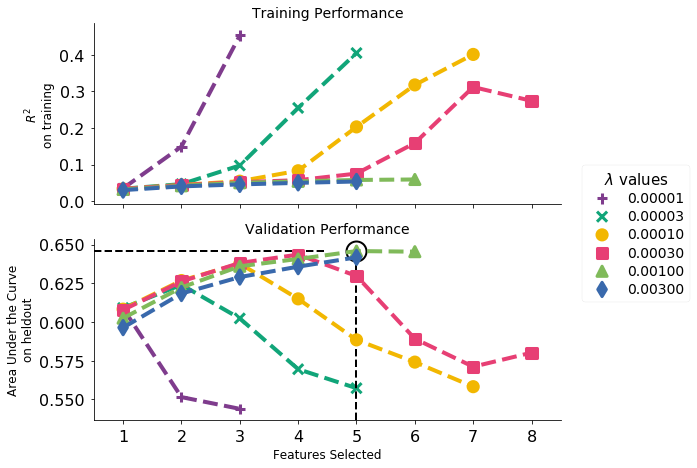

In [11]:
fname = 'cv/{}/performance.csv'.format(data_name)
fp, num_f, eval_val, lambda_, _ = utils.visualize_cv(fname,
                                                     split_version=split_version,
                                                     validation_metric=metric,
                                                     metric_name=metric_name,
                                                     color_list=color_list[::-1], 
                                                     #color_list=['k']*6, 
                                                     fp_kwargs=fp_kwargs,
                                                     legend_kwargs=legend_kwargs)

##### regressin

In [34]:
type_ = 'regression'
data_name = 'pol'
split_version = 0
metric = 'mse'
metric_name = 'Mean Square Error'
fp_kwargs = {'size': 3.5, 'aspect': 2.7, 'alpha': 0.75,}
legend_kwargs = {'ncol': 1, 'loc': 7, 'labelspacing': 0.3,
                 'title': r'$\lambda$ values',
                 'prop': {'size': 14},
                 #'bbox_to_anchor': (1, )
                }

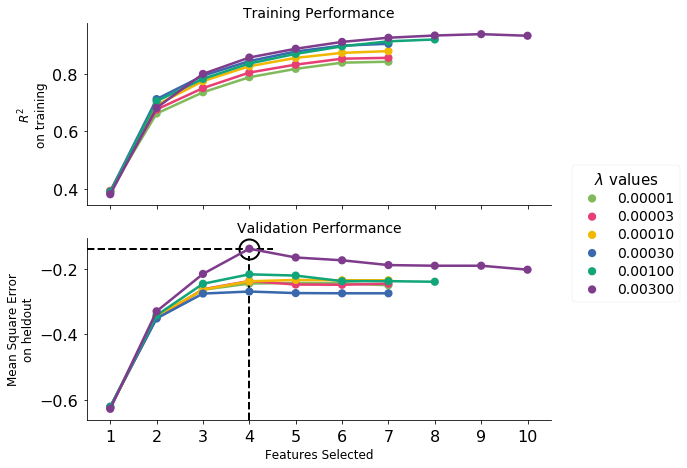

In [35]:
fname = 'cv/{}/performance.csv'.format(data_name)
fp, num_f, eval_val, lambda_, _ = utils.visualize_cv(fname,
                                                     split_version=split_version,
                                                     validation_metric=metric,
                                                     metric_name=metric_name,
                                                     color_list=color_list, 
                                                     fp_kwargs=fp_kwargs,
                                                     legend_kwargs=legend_kwargs)

---

#### table for all parameters

maybe list this in appendix?
- Dataset
- Split Index
- $\lambda$
- $max\_features$

In [4]:
param_df = list()
for type_, data_list in data_dict.items():
    if type_ == 'classification':
        metric = 'auc_micro'
    else:
        metric = 'mse'
    for data_name in data_list:
        df = utils.find_best_param('cv/{}/performance.csv'.format(data_name), metric)
        df = df[['split_version', 'lambda_', 'num_features']]
        df.columns = ['Split Index', r'$\lambda$', r'$max\_features$']
        df['Dataset'] = data_name
        df['Prediction Task'] = type_
        param_df.append(df)
param_df = pd.concat(param_df, ignore_index=True)
param_df = param_df[['Dataset', 'Prediction Task', 'Split Index', r'$\lambda$', r'$max\_features$']]

In [5]:
param_df.to_csv('s3d_hyperparameter_df.csv', index=False)